# Проект: Статистический анализ данных

Иследование данных популярного сервиса аренды самокатов GoFast. 

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.



**Заказчик**: Продакт-менеджеры сервиса аренды самокатов GoFast. 

**Цель исследования** — Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти:
1.  Пользователи с подпиской могут быть «выгоднее» для компании. *Необходимо: Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки, проверить тратят ли пользователи с подпиской больше времени на поездки.* 

2.  Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и оно оптимальное с точки зрения износа самоката.

3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4. Количество обращений в техподдержку значимо снизилось после обновления сервера, с которыми взаимодействует мобильное приложение.


**Входные данные от сервиса**:  данные о некоторых пользователях из нескольких городов, а также об их поездках с использованием самокатов сервиса аренды  GoFast.
* Данные о пользователях содержатся в файле — `users_go.csv`
* Данные о поездках содержатся в файле — `rides_go.csv`
* Данные о подписках содержатся в файле — `subscriptions_go.csv`

**Результаты исследования**: будут учтены при проведении различных акций сервиса, которые будут направлены на увеличение количества пользователей с подпиской. 


Основываясь на данных сервиса  GoFast о некоторых пользователях из нескольких городов, а также об их поездках, необходимо проанализировать информацию и выяснить несколько важных моментов о работе сервиса.


О качестве данных ничего не известно. Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

**Установка дополнительных необходимых библиотек**

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


**Импорт необходимых библиотек**

In [2]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # Графики
%matplotlib inline
from matplotlib import rcParams, rcParamsDefault# Графики
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator) # Графики
import missingno as msno # импорт библиотеки для визуализации недостающих данных в датафреймах Pandas
import numpy as np # библиотека для работы 
from scipy import stats as st # подключение модуля stats из библиотеки scipy

In [3]:
# настройка отображения данных
# Отображение всех колонок при выводе на печать
pd.set_option('display.max_columns', None)

#### Шаг 1. Загрузка данных

##### Загрузка данных о пользователях

Загрузим CSV-файлы с данными:
* /datasets/users_go.csv
* /datasets/rides_go.csv
* /datasets/subscriptions_go.csv

Выведем первые строки каждого набора данных и  изучим общую информацию о каждом датафрейме.

In [4]:
# чтение csv-файла с данными о пользователях (/datasets/users_go.csv) в DataFrame и сохранение в  переменную "data_users"
try:
    data_users = pd.read_csv('/datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [5]:
# получение первых 10 строк таблицы data_users 
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
# посмотрим типы данных и кол-во ненулевых значений, определим некорректное ли именование столбцов.
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Согласно описанию данных таблица `data_users` включает в себя следующие столбцы:
* `user_id` -	уникальный идентификатор пользователя
* `name` -	имя пользователя
* `age` -	возраст
* `city` -	город
* `subscription_type`	тип подписки (free, ultra)

Из общей информации таблица `data_users` видим:
1. В названиях колонок нарушения хорошего стиля *не наблюдается*.
2. В таблице 5 столбцов.
3. Тип данных столбцов автоматически определились следующим образом:
    * целочисленный тип(int64): user_id, age
    * строковый тип(object): name, city, subscription_type.
4. Автоматическое определение типов данных соответствуетс фактическим.     
5. Общее число записей таблицы:  1565.
6. Количество значений в столбцах одинаковое и совпадае с общим числом записей в DataFrame. Значит, в данных нет пропущенных значений.

##### Загрузка данных о поездках

In [7]:
# чтение csv-файла с данными о поездках (/datasets/rides_go.csv) в DataFrame и сохранение в  переменную "data_rideso"
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [8]:
# получение первых 10 строк таблицы data_users 
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [9]:
# посмотрим типы данных и кол-во ненулевых значений, определим некорректное ли именование столбцов.
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Согласно описанию данных таблица `data_rides` включает в себя следующие столбцы::
* `user_id` - уникальный идентификатор пользователя;
* `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до * момента, как он нажал кнопку «Завершить поездку»;
* `date` - дата совершения поездки;

Из общей информации таблица `data_rides` видим:
1. В названиях колонок нарушения хорошего стиля *не наблюдается*.
2. В таблице 1 столбцов.
3. Тип данных столбцов автоматически определились следующим образом:
    * целочисленный тип(int64): user_id;
    * вещественный тип (float64): distance, duration
    * строковый тип(object): date.      
4. Автоматическое определение типов данных не соответствуетс фактическим. Необходимо преобразование значений столбца `date` к типу данных  date.
5. Общее число записей таблицы:  18068.
6. Количество значений в столбцах одинаковое и совпадае с общим числом записей в DataFrame. Значит, в данных нет пропущенных значений.

##### Загрузка данных о подписках

In [10]:
# чтение csv-файла с данными о подписках (/datasets/subscriptions_go.csv) в DataFrame 
# и сохранение в  переменную "data_subscriptions"
try:
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [11]:
# получение первых 10 строк таблицы data_users 
data_subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
# посмотрим типы данных и кол-во ненулевых значений, определим некорректное ли именование столбцов.
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Согласно описанию данных таблица `data_subscriptions` включает в себя следующие столбцы::
* `subscription_type` - тип подписки;
* `minute_price` - стоимость одной минуты поездки по данной подписке;
* `start_ride_price` - стоимость начала поездки;
* `subscription_fee` - стоимость ежемесячного платежа;


Из общей информации таблица `data_subscriptions` видим:
1. В названиях колонок нарушения хорошего стиля *не наблюдается*.
2. В таблице 1 столбцов.
3. Тип данных столбцов автоматически определились следующим образом:
    * целочисленный тип(int64): user_id;
    * вещественный тип (float64): distance, duration
    * строковый тип(object): date.      
4. Автоматическое определение типов данных не соответствуетс фактическим. Необходимо преобразование значений столбца `date` к типу данных  date.
5. Общее число записей таблицы:  2.
6. Количество значений в столбцах одинаковое и совпадае с общим числом записей в DataFrame. Значит, в данных нет пропущенных значений.

Перед формированием общих промежуточных выводов по этапу загрузки данных взглянем на гистограммы всех количественных (числовых) столбцов таблиц исследуемых таблиц на выявление явных выбросов.

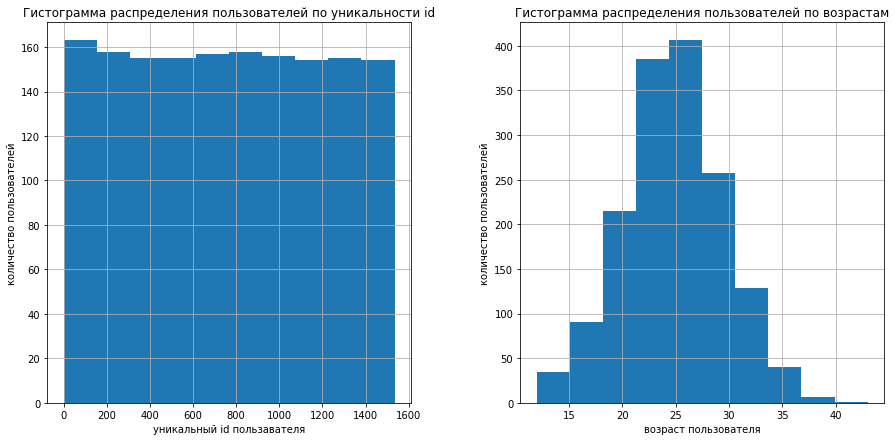

In [13]:
# Построим гистограммы для всех числовых столбцов таблицы о пользователях 'data_users' на одном графике. 
fig = data_users.hist(figsize=(15, 7))
tables =[ 
    ['Гистограмма распределения пользователей по уникальности id', 'уникальный id пользавателя', 'количество пользователей'],
    ['Гистограмма распределения пользователей по возрастам', 'возраст пользователя', 'количество пользователей']
   ]
cnt = 0
for  ax in fig.ravel():
    try:
        ax.set_title(tables[cnt][0])
        ax.set_xlabel(tables[cnt][1])
        ax.set_ylabel(tables[cnt][2])
    except:  
        pass
    cnt += 1
plt.show()

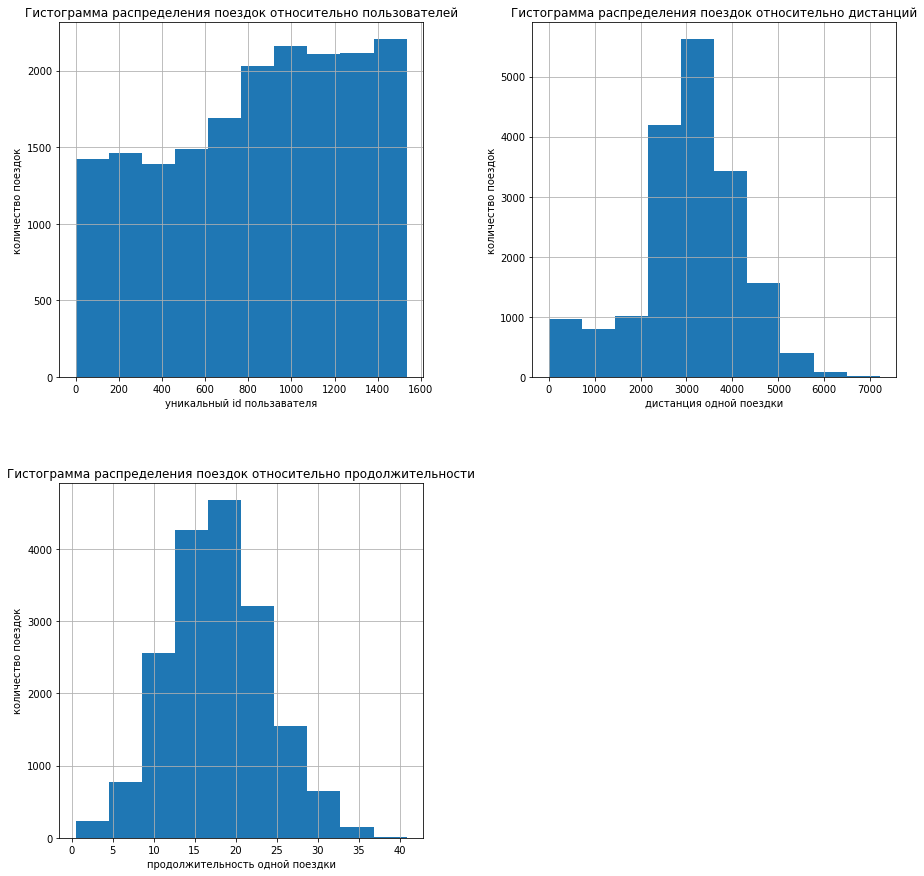

In [14]:
# Построим гистограммы для всех числовых столбцов таблицы о поездках 'data_rides' на одном графике. 
fig = data_rides.hist(figsize=(15, 15))
tables =[ 
    ['Гистограмма распределения поездок относительно пользователей', 'уникальный id пользавателя', 'количество поездок'],
    ['Гистограмма распределения поездок относительно дистанций', 'дистанция одной поездки', 'количество поездок'],
    ['Гистограмма распределения поездок относительно продолжительности', 'продолжительность одной поездки', 'количество поездок']
   ]
cnt = 0
for  ax in fig.ravel():
    try:
        ax.set_title(tables[cnt][0])
        ax.set_xlabel(tables[cnt][1])
        ax.set_ylabel(tables[cnt][2])
    except:  
        pass
    cnt += 1
plt.show()

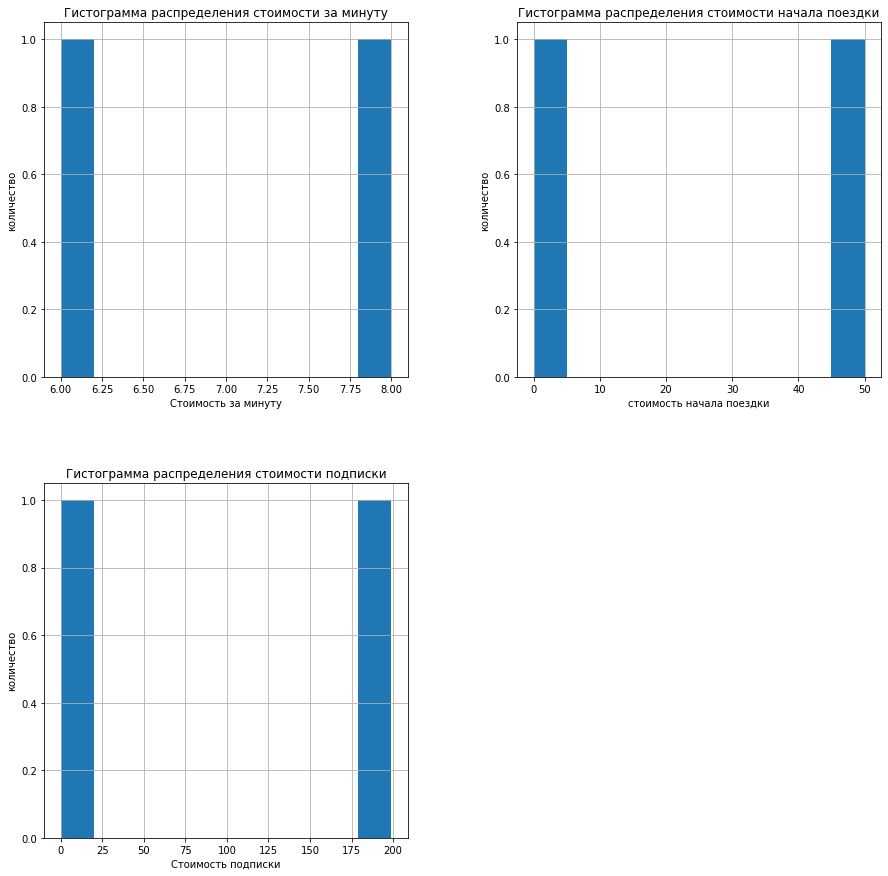

In [15]:
# Построим гистограммы для всех числовых столбцов таблицы о подписках 'data_subscriptions' на одном графике. 
fig= data_subscriptions.hist(figsize=(15, 15))
tables =[ 
    ['Гистограмма распределения стоимости за минуту', 'Стоимость за минуту', 'количество'],
    ['Гистограмма распределения стоимости начала поездки', 'стоимость начала поездки', 'количество'],
    ['Гистограмма распределения стоимости подписки', 'Стоимость подписки', 'количество']
   ]
cnt = 0
for  ax in fig.ravel():
    try:
        ax.set_title(tables[cnt][0])
        ax.set_xlabel(tables[cnt][1])
        ax.set_ylabel(tables[cnt][2])
    except:  
        pass
    cnt += 1
plt.show()

Таблица о пользователях `data_users` содержит справочную информацию о каждом пользователе мобильного приложения сервиса аренды самокатов GoFast, поэтому значения записей в данной таблице должны быть уникальны и соответствовать правилу 1 запись = 1 пользователю, т.е. все user_id должны быть уникальны.
Проверим столбец `user_id` - уникальный идентификатор пользователя на отсутствие явных дубликатов

In [16]:
# Чтобы посчитать явные дубликаты применим метод duplicated(), результат метода передадим функции sum()
data_users['user_id'].duplicated().sum()

31

##### Выводы:
1. названия колонок соответствуют требованиям хорошего стиля и не требуют корректировки.
2. В данных всех трех таблиц отсутсвуют пропуски.
3. В данных числовых столбцов отсутствуют явные выбросы.
4. В таблице `data_rides` требуется приведение столбеца date к типу даты 
5. В таблице `data_users` присутствуют явное дублирование данных, что является нарушением качества данных.
6. Предварительно можно утверждать, что данных достаточно для проверки гипотез.

В связи наличием п.4 и п. 5 возникает необходимость проведения предподготовки данных к анализу.

#### Шаг 2. Предобработка данных

Перед проведением исследовательского анализаи проверки установленных гипотез, проведем следующую предобработку данных:
* Приведем столбец date к типу даты pandas.
* Создим новый столбец с номером месяца на основе столбца date.
* Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

#####  Приведение столбеца `date` таблице `data_rides`  типу даты.

Перед проведением процедуры приведения столбца `date` таблице `data_rides`  типу даты, посмотрим еще раз на значения таблицы, сделав небольшую выборку даннх

In [17]:
# получение первых 5 строк таблицы data_rides
data_rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [18]:
#  Приведение столбеца `date` таблице `data_rides`  типу даты.
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [19]:
# проверка результата
# получение первых 5 строк таблицы data_rides
print(data_rides.head(5))

   user_id     distance   duration       date
0        1  4409.919140  25.599769 2021-01-01
1        1  2617.592153  15.816871 2021-01-18
2        1   754.159807   6.232113 2021-04-20
3        1  2694.783254  18.511000 2021-08-11
4        1  4028.687306  26.265803 2021-08-28


In [20]:
# получение общей информации о данных в таблице data_rides 
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#####  Проверка наличия пропущенных значений. 

Еще раз визуально убедимся в отсутствии пропусков в иследуемых таблицах

###### Анализ полноты данных в таблице о пользователях data_users

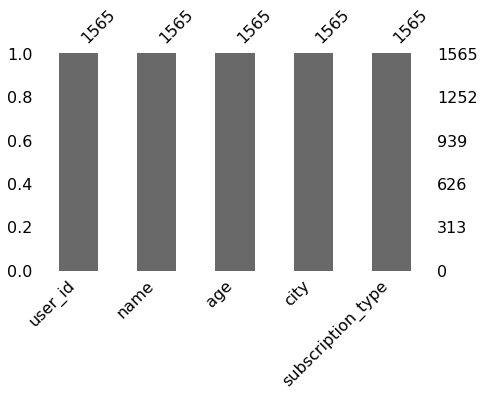

In [21]:
msno.bar(data_users, figsize=(7, 4))
plt.show()

###### Анализ полноты данных в таблице о поезках data_rides

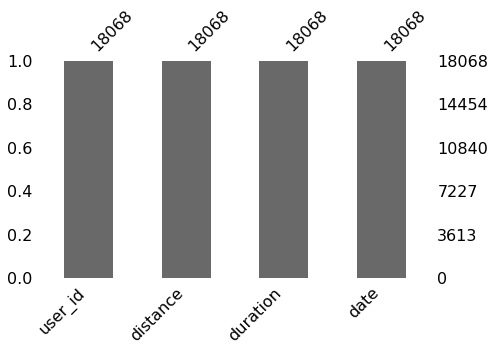

In [22]:
msno.bar(data_rides, figsize=(7, 4))
plt.show()

######  Анализ полноты данных в таблице о подписках data_subscriptions

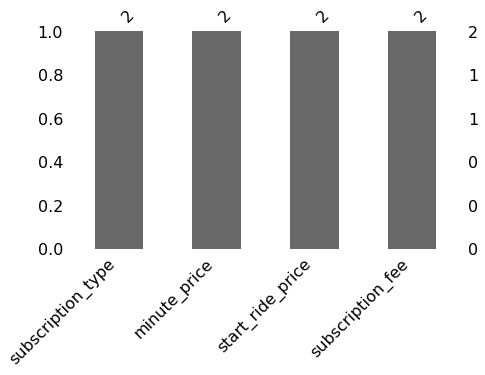

In [23]:
msno.bar(data_subscriptions, figsize=(7, 4))
plt.show()

#####  Проверка наличия дубликатов в датафреймах. 

######  Проверка дубликатов в таблице о пользователях `data_users`. 

На этапе загрузки данныз было выявлено, что в таблице о пользователях `data_users` имеются явные дубликаты в столбце  `user_id` - уникальный идентификатор пользователя

In [24]:
# найдем количество записей дубликатов
data_users.sort_values(by='user_id').loc[data_users['user_id'].duplicated() == True].count()

user_id              31
name                 31
age                  31
city                 31
subscription_type    31
dtype: int64

Еще раз убедились что в таблице о пользователях `data_users` имеются явные дубликаты в количестве 31 записи. Удалим дублирующие строки.

In [25]:
# Удаление дубликатов идентификаторов в столбце 'user_id' датафрейма 'data_users'
data_users = data_users.sort_values(by='user_id').loc[data_users['user_id'].duplicated() == False]

In [26]:
# Проверка наличия дубликатов  в столбце 'user_id' датафрейма 'data_users'
if data_users['user_id'].nunique() == data_users.shape[0]:
    print(f'Явные дубликаты устранены. Общее количество уникальных записей {data_users.shape[0]}')
else:
    print('Имеются дубликаты')

Явные дубликаты устранены. Общее количество уникальных записей 1534


Таким образом мы избавились от дубликатов.

######  Проверка дубликатов в таблице о поездках `data_rides`. 

In [27]:
# Чтобы посчитать явные дубликаты применим метод duplicated(), результат метода передадим функции sum()
print(data_rides[data_rides.duplicated ()])

Empty DataFrame
Columns: [user_id, distance, duration, date]
Index: []


Явные дубликаты в таблице о поездках не выявлены.

#####  Создание новыго столбеца с номером месяца в таблице `data_rides`.

Для проверки третей гипотезы

`3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.`

в таблице о поездках  `data_rides` необходим дополнительный столбец `month` содержащий номер месяца в котором была совершена поездка.

Перед создание столбца `month`, проверим за какой период имеются данные в таблице о поездках. Если данные вперставлены за несколько лет необходимо учитывать данный факт, и следовательно нужно будет ввести дополнительный столбец содержащий год поездки. Проверим это:

In [28]:
min_d = min(data_rides['date'])
max_d = max(data_rides['date'])
print(f"Данные о поездках в период с {min_d} по {max_d}")

Данные о поездках в период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


Видим, что в таблице о поездках содержится информация о поездках совершенных в одином 2021 календарном году. 
Следовательно  можно создавать смело создавать столбец `month` содержащий номер месяца, в котором была совершена поездка, без дополнительного учета года поездки.

In [29]:
data_rides['month'] = pd.DatetimeIndex(data_rides['date']).month 

In [30]:
#напишем функцию получения названия месяца, используя метод apply применимо к каждой строке датафрейма через axis = 1
def name_month(row):
    num_month = row['month']
    m = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь'] 
    return m[num_month-1]
    
#определим название месяца
data_rides['name_month'] = data_rides.apply(name_month, axis = 1)

In [31]:
#проверим заполнение нового столбца month. Выведем первые 10 строк таблицы data_rides
data_rides.head()

,user_id,distance,duration,date,month,name_month
0,1,4409.919140,25.599769,2021-01-01,1,январь
1,1,2617.592153,15.816871,2021-01-18,1,январь
2,1,754.159807,6.232113,2021-04-20,4,апрель
3,1,2694.783254,18.511000,2021-08-11,8,август
4,1,4028.687306,26.265803,2021-08-28,8,август


##### Выводы:
В ходе предобработки данных:
1. Мы избывились от явные нарушения качества данных:
    * Убрали дублирующие строки в таблице-справочнике пользователи 'data_users' ;
    * Произвели приведение столбеца date таблице data_rides типу даты.
2. Убедились в отсутствии пропусков во всех трех таблицах.
3. Созданли новый столбец `month`  с номером месяца в таблице `data_rides`, который понадобится при проведении анализа данных и проверки гипотез.

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках, проведя исследовательский анализ данных следующих параметров:

1. частота встречаемости городов;
2. соотношение пользователей с подпиской и без подписки;
3. возраст пользователей;
4. расстояние, которое пользователь преодолел за одну поездку;
5. продолжительность поездок.

##### Анализ частоты встречаемости городов;

In [32]:
def chart_captions_barh(df_for_plot):
    for i, value in enumerate(df_for_plot.values):
        plt.text( value, i, str(value), ha='left', va='center')

In [33]:
def chart_captions_barh1(df_for_plot):
    for i, value in enumerate(df_for_plot.values):
        plt.text( value, i-0.1, str(value), ha='left', va='center')

In [34]:
def chart_captions_barh2(df_for_plot):
    for i, value in enumerate(df_for_plot.values):
        plt.text( value, i+0.1, str(value), ha='left', va='center')


 Анализ частоты встречаемости городов


,Количество,Процент от общего числа
city,,
Пятигорск,219,14.28%
Екатеринбург,204,13.3%
Ростов-на-Дону,198,12.91%
Краснодар,193,12.58%
Сочи,189,12.32%
Омск,183,11.93%
Тюмень,180,11.73%
Москва,168,10.95%


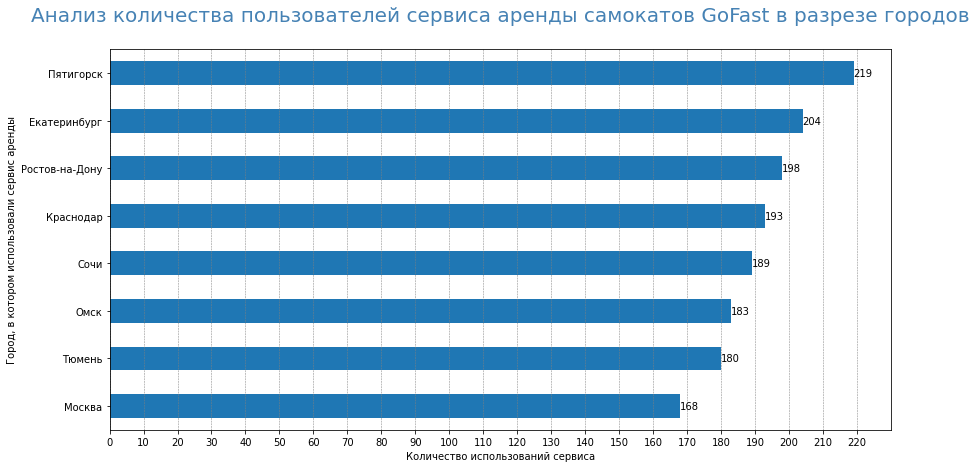


Описание общей информации о частоте встречаемости городов


,Количество,Доля
count,8.000000,8.000000
mean,191.750000,0.125000
std,15.672998,0.010217
min,168.000000,0.109518
25%,182.250000,0.118807
50%,191.000000,0.124511
75%,199.500000,0.130052
max,219.000000,0.142764


In [35]:
result = data_users.groupby(['city'])['city'].agg(['count']).sort_values(by='count', ascending=False)
result['Доля'] = result['count'] / result['count'].sum()
result['Процент от общего числа'] = round(result['count'] / result['count'].sum()*100,2).astype('str')+'%'
result = result.rename(columns={'count': 'Количество'}) 

# формирование таблицы соотношения пользователей с подпиской и без подписки
print('\n Анализ частоты встречаемости городов')
display(result[['Количество','Процент от общего числа']])


# посторение визуализации
vs_users=result['Количество'].sort_values(ascending=True)
( vs_users.plot.barh(y=vs_users.index, x=vs_users.values,
    figsize = (14, 7)
    ).
set_title("Анализ количества пользователей сервиса аренды самокатов GoFast в разрезе городов"+"\n", fontsize = 20, color = "SteelBlue")
) 
chart_captions_barh(vs_users)
# настройка сетки
plt.grid(axis = 'x', linestyle = '--', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
plt.xticks(range(0, max(vs_users.values)+10, 10))
plt.gca().set(ylabel = 'Город, в котором использовали сервис аренды', xlabel = 'Количество использований сервиса')

plt.show()

# формирование таблицы общей информации
print('\nОписание общей информации о частоте встречаемости городов')
result.describe()

Всего сервисом аренды самокатов GoFast пользуются в 8 городах. Размах частоты использования между городами - 54 поездка.
Средняя частота поездок в горадах = 191.95 поездок и примерно равно медиане  (191 поездок)
Лидером по частоте поездок является Пятигорск (219 строк). Следом идут Екатеринбург (204 строки) и Ростов-на-Дону (198 строк). Лидер антирейтинга — Москва (168 строк).

##### Анализ соотношения пользователей с подпиской и без подписки

In [36]:
#функция подписи значение на круговой диаграмме
def my_fmt(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.2f}%\n({v:d})'.format(pct, v=val)
    return my_format




Cоотношении пользователей с подпиской и без подписки


,Количество,Процент от общего числа
subscription_type,,
ultra,699,45.57%
free,835,54.43%


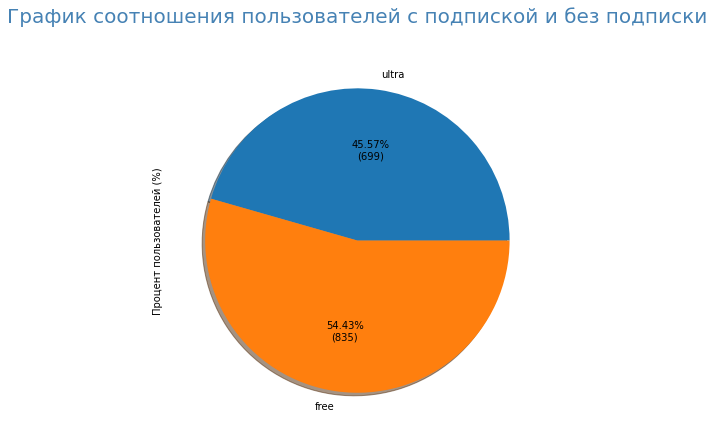


Описание общей информации о соотношении пользователей с подпиской и без подписки


,Количество,Доля
count,2.000000,2.000000
mean,767.000000,0.500000
std,96.166522,0.062690
min,699.000000,0.455671
25%,733.000000,0.477836
50%,767.000000,0.500000
75%,801.000000,0.522164
max,835.000000,0.544329


In [37]:
result = data_users.groupby(['subscription_type'])['subscription_type'].agg(['count']).sort_values(by='count')
result['Доля'] = result['count'] / result['count'].sum()
result['Процент от общего числа'] = round(result['count'] / result['count'].sum()*100,2).astype('str')+'%'
result = result.rename(columns={'count': 'Количество'}) 

# формирование таблицы соотношения пользователей с подпиской и без подписки
print('\nCоотношении пользователей с подпиской и без подписки')
display(result[['Количество','Процент от общего числа']])
# посторение визуализации

(result['Количество'].plot.pie(autopct = my_fmt(result['Количество']), shadow=True, 
    label="Процент пользователей (%)", figsize = (14, 7)).
set_title("График соотношения пользователей с подпиской и без подписки"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.show()

# формирование таблицы общей информации
print('\nОписание общей информации о соотношении пользователей с подпиской и без подписки')
display(result.describe())



Пользователей с подпиской «free» всего 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».

##### Анализ возраста пользователей

In [38]:
def chart_captions_bar(df_for_plot):
    for i, value in enumerate(df_for_plot.values):
        plt.text( i, value, str(value), ha='center', va='bottom')


Cоотношении пользователей в разрезе возрастов


,Количество,Процент от общего числа
age,,
25,145,9.45%
24,132,8.6%
26,131,8.54%
23,129,8.41%
27,119,7.76%
22,119,7.76%
28,112,7.3%
21,93,6.06%
20,71,4.63%


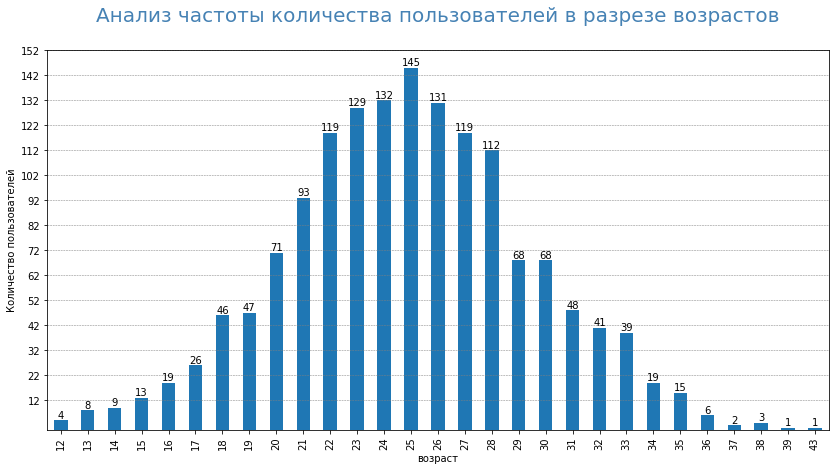


Описание общей информации о возрасте пользователей


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [39]:
result = data_users.groupby(['age'])['age'].agg(['count'])
result['Доля'] = result['count'] / result['count'].sum()
result['Процент от общего числа'] = round(result['count'] / result['count'].sum()*100,2).astype('str')+'%'
result = result.rename(columns={'count': 'Количество'}) 



# формирование таблицы соотношения пользователей с подпиской и без подписки
print('\nCоотношении пользователей в разрезе возрастов')
display(result[['Количество','Процент от общего числа']].sort_values(by='Количество',ascending=False))

# посторение визуализации
vs_users=result['Количество']
vs_users.plot.bar(y=vs_users.index, x=vs_users.values,
    figsize = (14, 7)).set_title("Анализ частоты количества пользователей в разрезе возрастов"+"\n", fontsize = 20, color = "SteelBlue")
plt.ylabel('Количество пользователей')
plt.xlabel('возраст')

chart_captions_bar(vs_users)
# настройка сетки
plt.grid(axis = 'y', linestyle = '--', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
plt.yticks(range(12, max(vs_users.values)+10, 10))

plt.show()

# формирование таблицы общей информации
print('\nОписание общей информации о возрасте пользователей')
result['age']=result.index
display(data_users['age'].describe())

Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. Распределение возрастной кривой имеет нормальное распределение. Максимальное количество пользователей в возрасте 25 лет, этот же возраст практически является медианным (т.е.  Средний возраст и медиана практически совпадают)

##### Анализ расстояния, которое пользователь преодолел за одну поездку

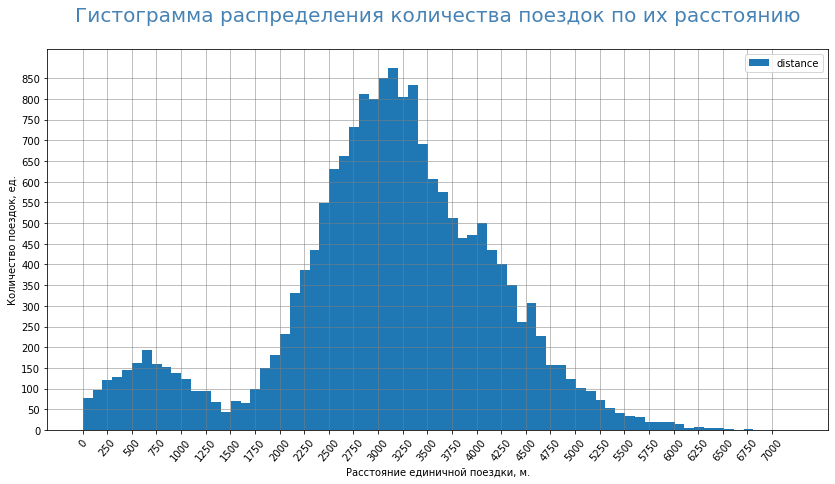

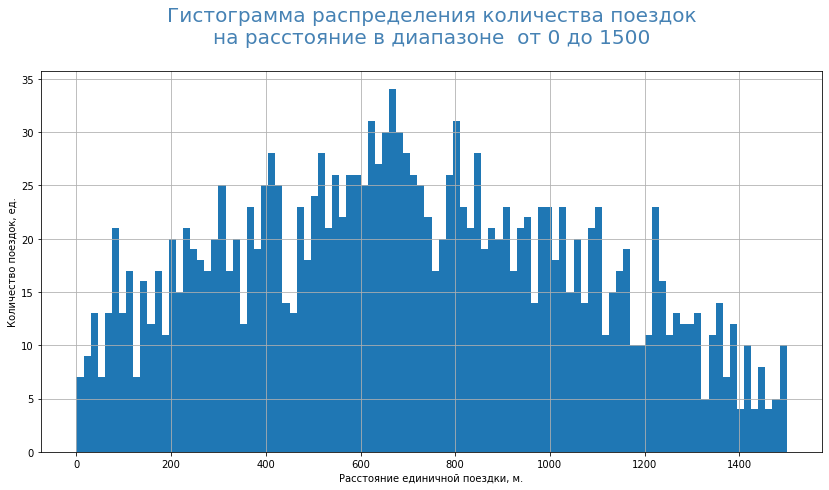

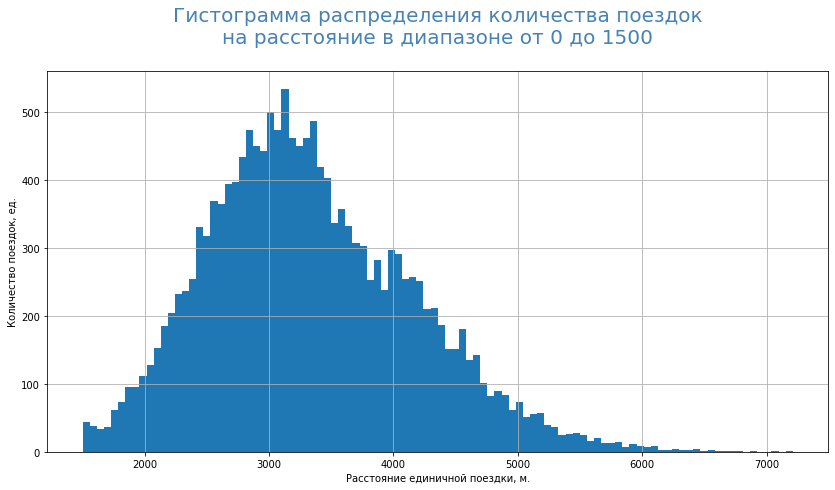


 Описание данных о расстоянии поездок
count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2543.0
50%       3134.0
75%       3776.0
max       7211.0
Name: distance, dtype: float64


In [40]:
# посторение визуализации

bins_num = int((data_rides['distance'].max()-data_rides['distance'].min()) / 100)
(data_rides.plot(y = 'distance', kind = 'hist',bins = bins_num,  figsize = (14, 7), grid=True)
 .set_title("Гистограмма распределения количества поездок по их расстоянию"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.xlabel('Расстояние единичной поездки, м.')
plt.ylabel('Количество поездок, ед.')
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
x = data_rides['distance']
plt.xticks(np.arange(0, max(x), 250)) 
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 900, 50)) 

plt.show()


# посторение визуализации распределения количества поездок на расстояние в промежутке от 0 до 1500
(data_rides['distance'].round(0).sort_values().plot(kind = 'hist', bins = 100, 
                                                    range=(0,1500),  figsize = (14, 7), grid=True)
 .set_title("Гистограмма распределения количества поездок"+"\n"+ "на расстояние в диапазоне  от 0 до 1500"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.xlabel('Расстояние единичной поездки, м.')
plt.ylabel('Количество поездок, ед.')
plt.show()

# посторение визуализации распределения количества поездок на расстояние в промежутке от 1500 до 7211
(data_rides['distance'].round(0).sort_values().plot( kind = 'hist', bins = 100,
                                                    range=(1500, 7211),  figsize = (14, 7), grid=True)
 .set_title("Гистограмма распределения количества поездок"+"\n"+ "на расстояние в диапазоне от 0 до 1500"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.xlabel('Расстояние единичной поездки, м.')
plt.ylabel('Количество поездок, ед.')
plt.show()

# формирование таблицы общей информации
print('\n Описание данных о расстоянии поездок')
print(data_rides['distance'].describe().round(0))

За одну поездку пользователи преодолевают от 1 до 7211 метров. Медиана всех значений равна 3134 метров. 

Наблюдаются два пика:
* небольшой пик в районе 700 метров
* большой пик около 3200 метров. 

Между пиками значения нормально распределены.

##### Анализ продолжительности поездок.

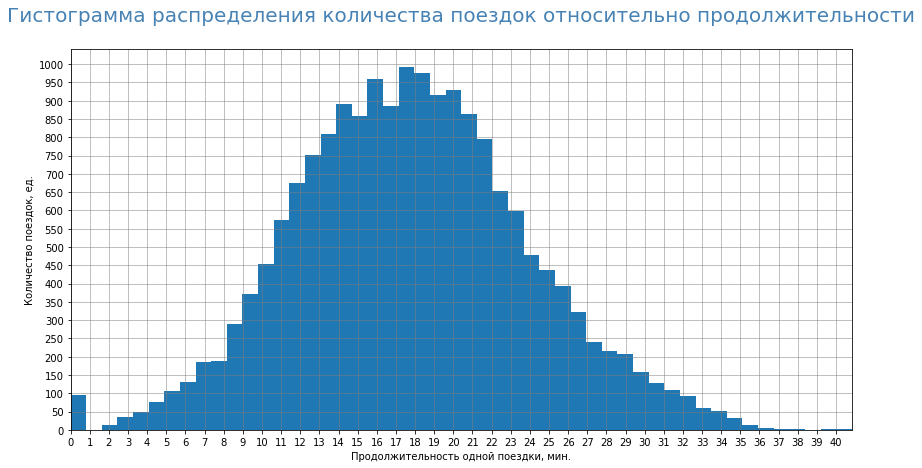


 Описание данных о продолжительности поездок
count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


In [41]:
# посторение визуализации распределения количества поездок на расстояние в промежутке от 1500 до 7211
(data_rides['duration'].sort_values().plot(x = 'duration', kind = 'hist', bins = 50, xlim=(0,max(data_rides['duration'])), 
                                           range=(0,max(data_rides['duration'])),
                                                    figsize = (14, 7), grid=True)
 .set_title("Гистограмма распределения количества поездок относительно продолжительности"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.xlabel('Продолжительность одной поездки, мин.')
plt.ylabel('Количество поездок, ед.')
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
plt.xticks(np.arange(0, max(data_rides['duration']), 1)) 
plt.yticks(np.arange(0, 1010 , 50)) 
plt.show()


# формирование таблицы общей информации
print('\n Описание данных о продолжительности поездок')
print(data_rides['duration'].describe())

Наблюдается анамалия поездок с продолжительностью до 1 минуту. Посмотрим на срез данных по продолжительности поезки менее 1 минут

In [42]:
print('\nТоп- 5 записей о поездках с максимальным расстоянием при продолжительности поездки <1')
display(data_rides.query('duration<=1').sort_values(by="distance", ascending=False).head(5))

print('\nТоп-5 записей о поездках с минимальным расстоянием при продолжительности поездки <1')
display(data_rides.query('duration<=1').sort_values(by="distance", ascending=False).tail(5))


print('\nОбщая информация о данных по поездкам с продолжительности поездки <1')
display(data_rides.query('duration<=1').describe())

print('\nсводная информация продолжительности поездки <1')
data_rides.query('duration<=1').pivot_table(index='duration',values='distance', aggfunc=('count', 'min', 'mean', 'max'))


Топ- 5 записей о поездках с максимальным расстоянием при продолжительности поездки <1


,user_id,distance,duration,date,month,name_month
16309,1411,7211.007745,0.5,2021-04-15,4,апрель
17242,1477,6724.932981,0.5,2021-01-12,1,январь
11385,1057,6601.197575,0.5,2021-02-07,2,февраль
13701,1224,6414.516026,0.5,2021-07-15,7,июль
14574,1285,6316.574814,0.5,2021-09-25,9,сентябрь



Топ-5 записей о поездках с минимальным расстоянием при продолжительности поездки <1


,user_id,distance,duration,date,month,name_month
14342,1268,4177.139336,0.5,2021-06-09,6,июнь
9698,937,4169.066800,0.5,2021-12-12,12,декабрь
10692,1006,4106.278268,0.5,2021-10-31,10,октябрь
17909,1524,4103.998874,0.5,2021-06-18,6,июнь
15132,1325,4030.308008,0.5,2021-12-22,12,декабрь



Общая информация о данных по поездкам с продолжительности поездки <1


,user_id,distance,duration,month
count,95.000000,95.000000,95.0,95.000000
mean,1092.210526,5113.176549,0.5,6.484211
std,244.028551,658.254104,0.0,3.709858
min,701.000000,4030.308008,0.5,1.000000
25%,901.000000,4611.510820,0.5,3.000000
50%,1069.000000,5052.769411,0.5,6.000000
75%,1310.500000,5488.459099,0.5,10.000000
max,1524.000000,7211.007745,0.5,12.000000



сводная информация продолжительности поездки <1


,count,max,mean,min
duration,,,,
0.5,95,7211.007745,5113.176549,4030.308008


Выявлено нарушение качества данных таблице о поездках. Обнаружено, что все поезки продолжительностью < 1 минуты имеют равную продолжительность 0.5 мин, при этом дистанция которую проехали в данных поездках достаточно больша для полминутной поезки и находится в диапазоне от 4030 до 7212 метров.
Логично предположить что при занесении данных произошел сбой единиц измений и для продолжительности вместо минут занеслись часы.

##### Анализ и обработка аномалий в данных о продолжительности поездок

Так как у нас имеется в наличии факт некачественных данных по продолжительности времени поездки, необходимо посмотреть как распределены эти 95 аномалий данных о обносительно общего числа поездк

In [43]:
def info_anomalies(data_rides):
    print(f'********************************  Обзор аномальй в данных  **************************************')
    print(f"Количество поездк c аномальной продолжительностью = 0.5 мин:    {data_rides.query('duration == 0.5')['duration'].count()};" )
    print(f"Количество поездк:    {data_rides['duration'].count()};" )
    pesent = round(data_rides.query('duration == 0.5')['duration'].count()/data_rides['duration'].count()*100,2)
    print(f"Процент поездк c аномальной продолжительностью от общего числа поездок:    {pesent} %;" )
    print(f"Количество поездк c продолжительностью = 30 мин:    {data_rides.query('duration == 30')['duration'].count()};" )
    print()


In [44]:
info_anomalies(data_rides)

********************************  Обзор аномальй в данных  **************************************
Количество поездк c аномальной продолжительностью = 0.5 мин:    95;
Количество поездк:    18068;
Процент поездк c аномальной продолжительностью от общего числа поездок:    0.53 %;
Количество поездк c продолжительностью = 30 мин:    0;



Видим что все 95 записей с некачественными данными занимают небольшой процент (0.53%) от общего числа поездок (18068).
При этом обратим внимание, что отсутствуют поездки с продолжительностью 30 минут, логично предположить что произошел сбой при вводе данных, и для всех поездок с продолжительностью поездки = 30 мин данные были занесены в часах (0.5 ч.)

Проведем преобразование аномальных данных, в ходе которого приведем часы к минутам.

In [45]:
# Преобразование данных с продолжительностью = 0.5 ч. в 30 мин
data_rides.loc[data_rides['duration'] == 0.5, 'duration'] = 30

Еще раз проведем анализ продолжительности поездок после процедуры преобразования.

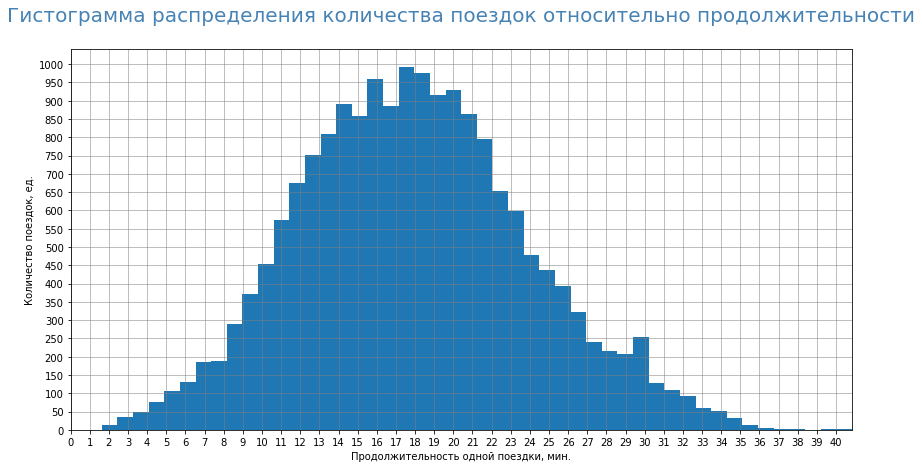


 Описание данных о продолжительности поездок
count    18068.000000
mean        17.960120
std          6.023636
min          2.035632
25%         13.697117
50%         17.750643
75%         21.824361
max         40.823963
Name: duration, dtype: float64


In [46]:
# посторение визуализации распределения количества поездок на расстояние в промежутке от 1500 до 7211
(data_rides['duration'].sort_values().plot(x = 'duration', kind = 'hist', bins = 50, xlim=(0,max(data_rides['duration'])), 
                                           range=(0,max(data_rides['duration'])),
                                                    figsize = (14, 7), grid=True)
 .set_title("Гистограмма распределения количества поездок относительно продолжительности"+"\n", fontsize = 20, color = "SteelBlue")
)
plt.xlabel('Продолжительность одной поездки, мин.')
plt.ylabel('Количество поездок, ед.')
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
plt.xticks(np.arange(0, max(data_rides['duration']), 1)) 
plt.yticks(np.arange(0, 1010 , 50)) 
plt.show()


# формирование таблицы общей информации
print('\n Описание данных о продолжительности поездок')
print(data_rides['duration'].describe())

Из "правильных данных" видим, что:
* продолжительность поездок нормально распределена от 2 до 41 минуты. 
* Продолжительность в среднем около 18 минут и приближенно равна медианному значению.

В ходе анализа выявили 95 записей о поездок с аномальными данными( продолжительностью до 1 минуту и большим расстоянием поездки). Для выявленных некачественных данных было проведено преобразование размерности значений 0.5ч=30 мин.

##### Выводы:
В ходе исследовательского анализа данных выявлено:

* Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. 
* Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
* Большая часть всех пользователей используют подписку «free». Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
* Максимальное количество в 219 поездок совершено в Пятигорске. 
* Минимальное количество в 168 поездок совершено в Москве.
* За одну поездку пользователи преодолевают от 2 до 7211 метров. Медиана всех значений равна 3134 метров. 
* Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
* Продолжительность поездок нормально распределена от 1 до 41 минуты. 
* Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. 
* Наблюдается выброс размером 95 поездок с продолжительностью в 0.5 минуты и большой продолжительностью
* Для выявленных некачественных данных было проведено преобразование размерности значений 0.5ч=30 мин.

#### Шаг 4. Объединение данных

Перед подсчетом выручки и проверкой гипотез
1. Объединим данные о пользователях, поездках и подписках в один датафрейм (Для этого воспользуйтесь методом merge()).
2. Создадим ещё два датафрейма из датафрейма, созданного на этапе 1:
   * c данными о пользователях без подписки;
   * с данными о пользователях с подпиской.
3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Объединение данных о пользователях, поездках и подписках в одну таблицу

Объединим данные из трех таблиц:
* `data_users` - таблица о пользователях, содержит информуцию о пользователях (является таблицей измерений).
* `data_rides` - таблица о поездках, содержит информацию о совершенных поездках пользователем (является таблицей фактов).
* `data_subscriptions` - - таблица о подписках, содержит информуцию о типах подписки (является таблицей измерений).

In [47]:
data_URS = data_rides.merge(data_users, on='user_id', how='inner')
data_URS = data_URS.merge(data_subscriptions, on='subscription_type', how='inner')

In [48]:
# выведем выборку из 20 первых элементов объединенной таблицы
data_URS.head(20)

,user_id,distance,duration,date,month,name_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,январь,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,январь,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,апрель,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,август,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,август,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,октябрь,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,октябрь,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199


In [49]:
# проверим не образовалось ли входе объединения пропуска значений
# выведем информацию о количесвте пустых значений по столбцам
data_URS[data_URS.isnull()].count()

user_id              0
distance             0
duration             0
date                 0
month                0
name_month           0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод**: Проведена проверка на наличие пропусков и на совпадение количества записей с одной из исходных таблиц, замечаний к качеству данных не выявлено. Объединение прошло успешно.

##### Создание стратифицированных выборо о поезках пользователей с подпиской и без подписки 

In [50]:
# функция формирования выборок по типу подписок и вывода обзорной информации по ней
def get_table_by_subscription(type_s, text_ts):
    data_URS_subscription = data_URS.query('subscription_type == @type_s')
    print("Обзор первых 10 строк данных о поездках пользователей", text_ts)
    display(data_URS_subscription.head(10))
    print('\nОбщие описательные статистики данных о поездках пользователей', text_ts)
    display(data_URS_subscription.describe())
    return data_URS_subscription

######  Выборка c данными о поездках пользователей без подписки

In [51]:
data_URS_free = get_table_by_subscription('free', "без подписки")

Обзор первых 10 строк данных о поездках пользователей без подписки


,user_id,distance,duration,date,month,name_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,январь,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,февраль,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,февраль,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,февраль,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,февраль,Айдар,22,Омск,free,8,50,0
6505,700,4342.002254,22.368009,2021-02-23,2,февраль,Айдар,22,Омск,free,8,50,0
6506,700,3798.334905,18.243756,2021-03-03,3,март,Айдар,22,Омск,free,8,50,0
6507,700,2984.551206,15.424899,2021-04-09,4,апрель,Айдар,22,Омск,free,8,50,0
6508,700,3360.107141,16.765497,2021-06-12,6,июнь,Айдар,22,Омск,free,8,50,0
6509,700,2567.543847,11.312160,2021-06-23,6,июнь,Айдар,22,Омск,free,8,50,0



Общие описательные статистики данных о поездках пользователей без подписки


,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,3045.495282,17.633172,6.522994,24.893326,8.0,50.0,0.0
std,241.165628,1246.173806,6.239577,3.449770,4.481100,0.0,0.0,0.0
min,700.000000,0.855683,2.035632,1.000000,12.000000,8.0,50.0,0.0
25%,915.000000,2366.562689,13.127082,4.000000,22.000000,8.0,50.0,0.0
50%,1123.000000,3114.648465,17.446822,7.000000,25.000000,8.0,50.0,0.0
75%,1328.000000,3905.697894,21.779484,9.000000,28.000000,8.0,50.0,0.0
max,1534.000000,7211.007745,34.948498,12.000000,43.000000,8.0,50.0,0.0


######  Выборка c данными о пользователях без подписки

In [52]:
type_s='ultra'
data_URS_ultra = get_table_by_subscription('ultra', "с подпиской")

Обзор первых 10 строк данных о поездках пользователей с подпиской


,user_id,distance,duration,date,month,name_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,январь,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,январь,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,апрель,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,август,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,август,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,октябрь,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,октябрь,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,ноябрь,Кира,22,Тюмень,ultra,6,0,199



Общие описательные статистики данных о поездках пользователей с подпиской


,user_id,distance,duration,month,age,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,3115.445388,18.541985,6.422308,24.892615,6.0,0.0,199.0
std,201.099339,836.895330,5.572048,3.414616,4.757208,0.0,0.0,0.0
min,1.000000,244.210438,3.760353,1.000000,12.000000,6.0,0.0,199.0
25%,175.000000,2785.444017,14.524654,4.000000,22.000000,6.0,0.0,199.0
50%,351.000000,3148.637229,18.178153,6.000000,25.000000,6.0,0.0,199.0
75%,525.000000,3560.574425,21.884129,9.000000,28.000000,6.0,0.0,199.0
max,699.000000,5699.769662,40.823963,12.000000,38.000000,6.0,0.0,199.0


* Общее количество поездок пользователей без подписки  = 11568
* Общее количество поездок пользователей с использованием подписки ‘ultra’ =6500
* Количество поездок пользователей без подпискина 5068 больше, чем с использованием подписки ‘ultra’ 

##### Визуализация информации о поездоках для пользователей обеих категорий.

###### Визуализация по расстоянию поездки

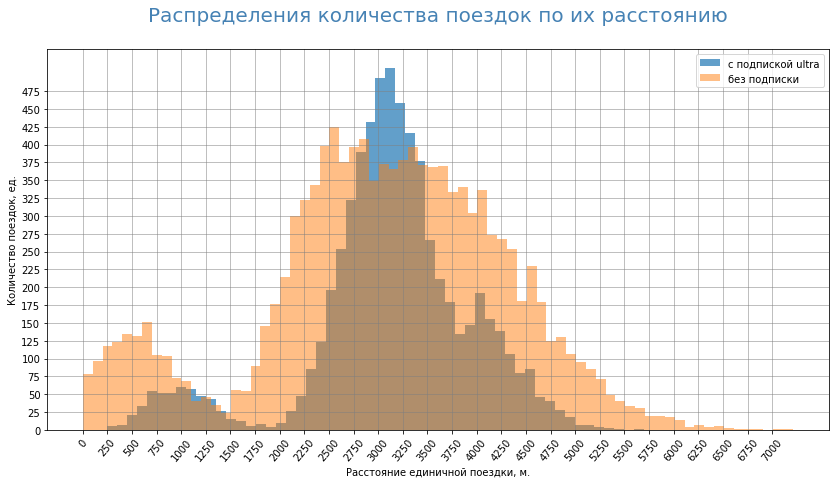


 Описание данных о расстоянии поездок для пользователей с подпиской ultra
count    11568.0
mean      3045.0
std       1246.0
min          1.0
25%       2367.0
50%       3115.0
75%       3906.0
max       7211.0
Name: distance, dtype: float64

 Описание данных о расстоянии поездок для пользователей без подписки
count    6500.0
mean     3115.0
std       837.0
min       244.0
25%      2785.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64

 Разница описательных значений данных о расстоянии для пользователей без подписки и с подпиской Ultra


count    5068.000000
mean      -69.950106
std       409.278476
min      -243.354755
25%      -418.881328
50%       -33.988764
75%       345.123469
max      1511.238083
Name: distance, dtype: float64

In [53]:
# посторение визуализации

bins_num = int((data_URS_ultra['distance'].max()-data_URS_ultra['distance'].min()) / 100)
ax = data_URS_ultra.plot(y = 'distance', kind = 'hist',bins = bins_num, alpha= 0.7, label='c подпиской ultra', figsize = (14, 7),  grid=True)

bins_num = int((data_URS_free['distance'].max()-data_URS_free['distance'].min()) / 100)
data_URS_free.plot(y = 'distance', kind = 'hist',bins = bins_num,  ax=ax, alpha= 0.5, label='без подписки')


plt.xlabel('Расстояние единичной поездки, м.')
plt.ylabel('Количество поездок, ед.')
plt.title("Распределения количества поездок по их расстоянию"+"\n", fontsize = 20, color = "SteelBlue")
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
x = data_URS_free['distance']
plt.xticks(np.arange(0, max(x), 250)) 
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 500, 25)) 
plt.show()

# формирование таблицы общей информации
print('\n Описание данных о расстоянии поездок для пользователей с подпиской ultra')
print(data_URS_free['distance'].describe().round(0))
# формирование таблицы общей информации
print('\n Описание данных о расстоянии поездок для пользователей без подписки')
print(data_URS_ultra['distance'].describe().round(0))

print("\n Разница описательных значений данных о расстоянии для пользователей без подписки и с подпиской Ultra") 
data_URS_free['distance'].describe() - data_URS_ultra['distance'].describe()


Дистанция поездок при без использования подписки более разнообразна. 
   
   * Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’.
   * Это же показывает и стандартное отклонение, которое для пользователей без подписки больше на 409.3 метров, чем при использовании подписки ‘ultra’. 
   * Средняя дистанция поездки у пользователей без подписки короче. Это следует из того, что среднее значениее на 70 метров (а медиана на 34 метра) меньше, чем при использовании ‘ultra’.

При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой пиком около 4000 метров. Меньший пик дистанииц для пользователей без подписки в районе 650-700 метров, а основной 2400-3300 метров. В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.

###### Визуализация по времени поездоки

Для данной визуализации будем применять подготовленные таблици с выборкой для пользователей с побпиской и без подписки  `data_URS_free` и `data_URS_ultra`

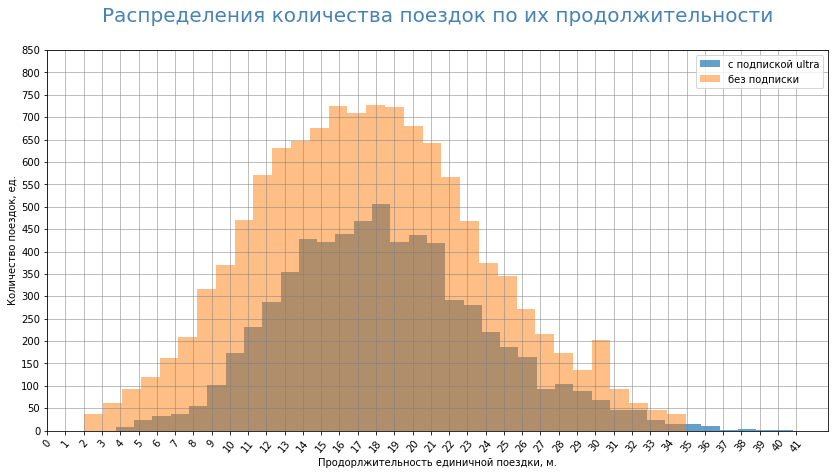


 Описание данных о продолжительности поездок для пользователей с подпиской ultra
count    11568.0
mean        18.0
std          6.0
min          2.0
25%         13.0
50%         17.0
75%         22.0
max         35.0
Name: duration, dtype: float64

 Описание данных о продолжительности поездок для пользователей без подписки
count    6500.0
mean       19.0
std         6.0
min         4.0
25%        15.0
50%        18.0
75%        22.0
max        41.0
Name: duration, dtype: float64

 Разница описательных значений данных о расстоянии для пользователей без подписки и с подпиской Ultra


count    5068.000000
mean       -0.908813
std         0.667529
min        -1.724720
25%        -1.397572
50%        -0.731331
75%        -0.104645
max        -5.875464
Name: duration, dtype: float64

In [54]:
# посторение визуализации

bins_num = int((data_URS_ultra['duration'].max()-data_URS_ultra['duration'].min()) / 1)
ax = data_URS_ultra.plot(y = 'duration', kind = 'hist', bins = bins_num, alpha= 0.7, label='c подпиской ultra', figsize = (14, 7),  grid=True)

bins_num = int((data_URS_free['duration'].max()-data_URS_free['duration'].min()) / 1)
data_URS_free.plot(y = 'duration', kind = 'hist',bins = bins_num,  ax=ax, alpha= 0.5, label='без подписки')


plt.xlabel('Продорлжительность единичной поездки, м.')
plt.ylabel('Количество поездок, ед.')
plt.title("Распределения количества поездок по их продолжительности"+"\n", fontsize = 20, color = "SteelBlue")
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
x = data_URS_free['duration']
plt.xticks(np.arange(0, 42, 1)) 
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 900, 50)) 
plt.show()

# формирование таблицы общей информации
print('\n Описание данных о продолжительности поездок для пользователей с подпиской ultra')
print(data_URS_free['duration'].describe().round(0))
# формирование таблицы общей информации
print('\n Описание данных о продолжительности поездок для пользователей без подписки')
print(data_URS_ultra['duration'].describe().round(0))

print("\n Разница описательных значений данных о расстоянии для пользователей без подписки и с подпиской Ultra") 
data_URS_free['duration'].describe() - data_URS_ultra['duration'].describe()

1. Продолжительность поездок у пользователей без подписки немного меньше по всем показателям, чем при использовании подписки ‘ultra’:
   * минимальное время меньше на 1.72 минуты
   * максимальное меньше на 5.88 минут.

2. В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. 
3. Пик количества поездок приходится на 17-19 минут.
4. Для пользователей без подписки наблюдается небольшой пик в районе 30 минут.

###### Визуализация по  возрастам пользователей

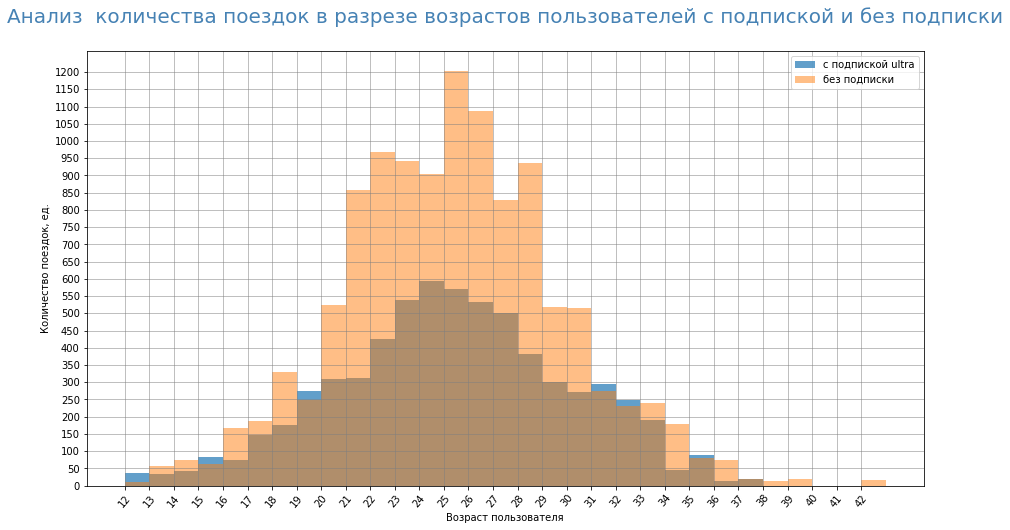


Описательные статистики возрастам пользователей без подписки по поездкам


count    11568.000000
mean        24.893326
std          4.481100
min         12.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         43.000000
Name: age, dtype: float64


Описательные статистики возрастам пользователей без подписки по поездкам


count    6500.000000
mean       24.892615
std         4.757208
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        38.000000
Name: age, dtype: float64


 Разница описательных значений данных о возрастах для пользователей без подписки и с подпиской Ultra по всем поездкам


count    5068.000000
mean        0.000711
std        -0.276108
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: age, dtype: float64

In [55]:
# посторение визуализации

bins_num = int((data_URS_ultra['age'].max()-data_URS_ultra['age'].min()) / 1)
ax = data_URS_ultra.plot(y = 'age', kind = 'hist', bins = bins_num, alpha= 0.7, label='c подпиской ultra', figsize = (15, 8),  grid=True)

bins_num = int((data_URS_free['age'].max()-data_URS_free['age'].min()) / 1)
data_URS_free.plot(y = 'age', kind = 'hist',bins = bins_num,  ax=ax, alpha= 0.5, label='без подписки')


plt.xlabel('Возраст пользователя')
plt.ylabel('Количество поездок, ед.')
plt.title("Анализ  количества поездок в разрезе возрастов пользователей с подпиской и без подписки"+"\n", fontsize = 20, color = "SteelBlue")
plt.xlim=(12,43)
# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
x = data_URS_free['duration']
plt.xticks(np.arange(12, 43, 1)) 
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 1201, 50)) 
plt.show()

print('\nОписательные статистики возрастам пользователей без подписки по поездкам')
display(data_URS_free['age'].describe())

print('\nОписательные статистики возрастам пользователей без подписки по поездкам')
display(data_URS_ultra['age'].describe())

print("\n Разница описательных значений данных о возрастах для пользователей без подписки и с подпиской Ultra по всем поездкам") 
display(data_URS_free['age'].describe() - data_URS_ultra['age'].describe())



# посторение визуализации
#df = data_URS.groupby(['age','subscription_type' ])['subscription_type'].count()
#df.unstack().plot(kind='bar', stacked=False,  figsize = (17, 12))

#plt.xlabel('Возраст пользователя')
#plt.ylabel('Количество поездок, ед.')
#plt.title("Анализ  количества поездок в разрезе возрастов пользователей с подпиской и без подписки"+"\n", fontsize = 20, color = "SteelBlue")
# настройка сетки
#plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)
#plt.xticks(rotation=50)
#plt.yticks(np.arange(0, 1200, 50)) 
#plt.show()



Возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей с подпиской ‘free’ и равен 43 годам.

###### Визуализация по месяцам поездок

subscription_type name_month  free  ultra
month                                    
12                   декабрь  1003    524
11                    ноябрь   926    492
10                   октябрь   946    529
9                   сентябрь  1002    515
8                     август   978    540
7                       июль   955    574
6                       июнь   988    565
5                        май   963    597
4                     апрель   955    551
3                       март   983    561
2                    февраль   868    468
1                     январь  1001    584


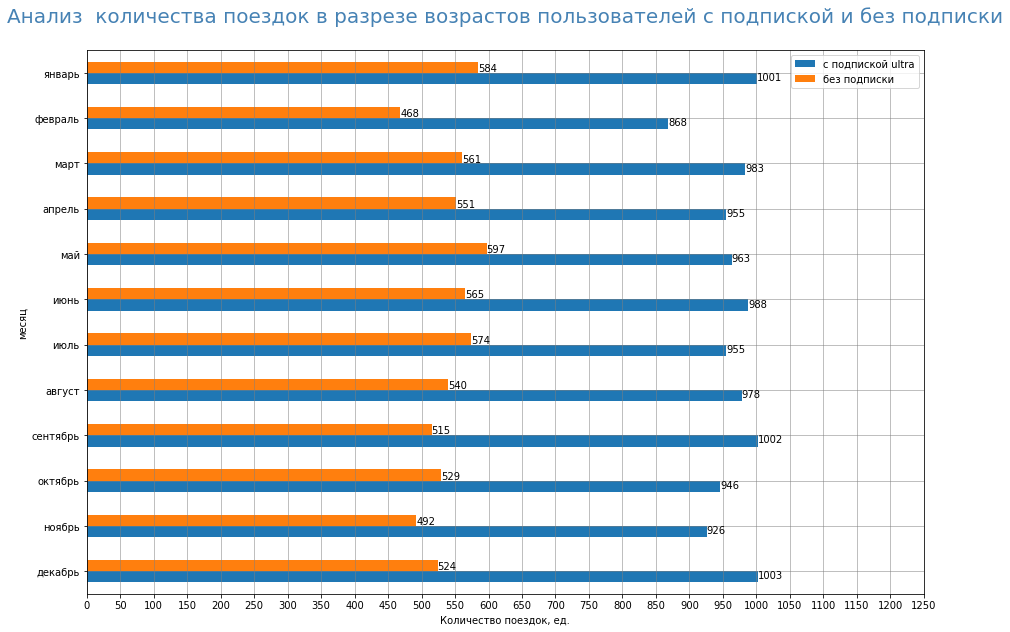


Описательные статистики возрастам пользователей без подписки по поездкам


count    11568.000000
mean         6.522994
std          3.449770
min          1.000000
25%          4.000000
50%          7.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64


Описательные статистики возрастам пользователей без подписки по поездкам


count    6500.000000
mean        6.422308
std         3.414616
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: month, dtype: float64


 Разница описательных значений данных о возрастах для пользователей без подписки и с подпиской Ultra по всем поездкам


count    5068.000000
mean        0.100687
std         0.035154
min         0.000000
25%         0.000000
50%         1.000000
75%         0.000000
max         0.000000
Name: month, dtype: float64

In [56]:

# посторение визуализации
df = data_URS.pivot_table(index = ['month'], columns=['subscription_type' ], values = 'user_id', aggfunc = 'count').sort_index(ascending=False)
df['month'] = df.index
df['name_month'] = df.apply(name_month, axis = 1)

print(df[['name_month','free','ultra']])
l_month=list(df['name_month'])
df[['free','ultra']].plot(kind='barh',  figsize = (15, 10)).set_yticklabels(l_month)


plt.ylabel('месяц')
plt.xlabel('Количество поездок, ед.')
plt.title("Анализ  количества поездок в разрезе возрастов пользователей с подпиской и без подписки"+"\n", fontsize = 20, color = "SteelBlue")

# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)


plt.yticks(np.arange(0, 12, 1)) 
plt.xticks(np.arange(0, 1251, 50)) 
plt.legend(["c подпиской ultra", "без подписки"]) 

chart_captions_barh1(df['free'])
chart_captions_barh2(df['ultra'])
plt.show()

print('\nОписательные статистики возрастам пользователей без подписки по поездкам')
display(data_URS_free['month'].describe())

print('\nОписательные статистики возрастам пользователей без подписки по поездкам')
display(data_URS_ultra['month'].describe())

print("\n Разница описательных значений данных о возрастах для пользователей без подписки и с подпиской Ultra по всем поездкам") 
display(data_URS_free['month'].describe() - data_URS_ultra['month'].describe())


1. Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у пользователей без подписки на июль. 
2. При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре. 
3. Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок).
4. Максимумы поездок пользователей без подписки в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки). 
5. Для пользователей без подписки нет выраженной сезонности, кроме спадов в феврале и ноябре.
6. При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.

###### Визуализация по городам пользователей

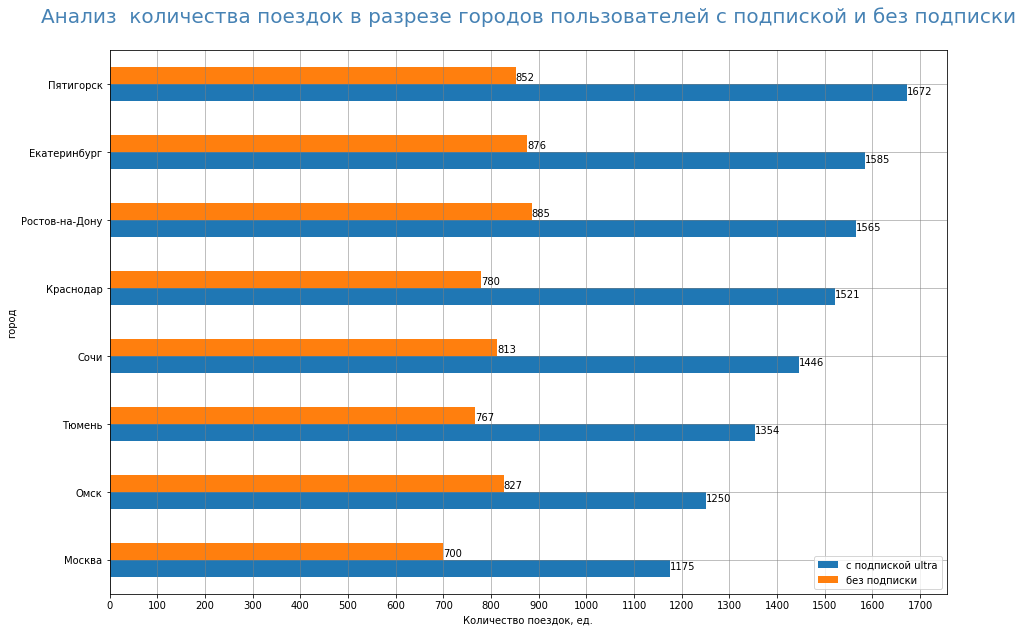


Сводная информация по городам пользователей без подписки по поездкам


subscription_type,free,Доля free по городу,Доля free по всем поездкам,ultra,Доля ultra по городу,Доля ultra по всем поездкам,Итого,Доля Итого по всем поездкам
city,,,,,,,,
Москва,1175.0,0.626667,0.065032,700.0,0.373333,0.038743,1875.0,0.103775
Омск,1250.0,0.601830,0.069183,827.0,0.398170,0.045772,2077.0,0.114955
Тюмень,1354.0,0.638378,0.074939,767.0,0.361622,0.042451,2121.0,0.117390
Сочи,1446.0,0.640106,0.080031,813.0,0.359894,0.044997,2259.0,0.125028
Краснодар,1521.0,0.661017,0.084182,780.0,0.338983,0.043170,2301.0,0.127352
Ростов-на-Дону,1565.0,0.638776,0.086617,885.0,0.361224,0.048982,2450.0,0.135599
Екатеринбург,1585.0,0.644047,0.087724,876.0,0.355953,0.048484,2461.0,0.136208
Пятигорск,1672.0,0.662441,0.092539,852.0,0.337559,0.047155,2524.0,0.139694
ИТОГО,11568.0,5.113261,0.640248,6500.0,2.886739,0.359752,18068.0,1.000000



Общая информация по горадам пользователей без подписки по поездкам


count         11568
unique            8
top       Пятигорск
freq           1672
Name: city, dtype: object


бщая информация  по городам пользователей без подписки по поездкам


count               6500
unique                 8
top       Ростов-на-Дону
freq                 885
Name: city, dtype: object


 Описательные статистики данных по городам для пользователей без подписки и с подпиской Ultra по всем поездкам


subscription_type,free,ultra
count,8.000000,8.000000
mean,1446.000000,812.500000
std,173.412802,61.923916
min,1175.000000,700.000000
25%,1328.000000,776.750000
50%,1483.500000,820.000000
75%,1570.000000,858.000000
max,1672.000000,885.000000


In [57]:
# посторение визуализации
df = data_URS.pivot_table(index = ['city'], columns=['subscription_type' ], values = 'user_id', aggfunc = 'count')
df.loc[:,'Итого'] = df.sum(axis=1) # добавление итогового столбца
m_i = df['Итого'].sum()
df['Доля free по городу'] = df['free']/df['Итого']
df['Доля free по всем поездкам'] = df['free']/m_i
df['Доля ultra по городу'] = df['ultra']/df['Итого']
df['Доля ultra по всем поездкам'] = df['ultra']/m_i
df['Доля Итого по всем поездкам'] = df['Итого']/m_i


df=df.sort_values(by='Итого', ascending=True)


df[['free','ultra']].plot(kind='barh', stacked=False,  figsize = (15, 10))


plt.ylabel('город')
plt.xlabel('Количество поездок, ед.')
plt.title("Анализ  количества поездок в разрезе городов пользователей с подпиской и без подписки"+"\n", fontsize = 20, color = "SteelBlue")

# настройка сетки
plt.grid('grid', linestyle = '-', which = 'major', color = 'grey', linewidth = 0.5,  zorder = 0)


plt.yticks(np.arange(0, 8, 1)) 
plt.xticks(np.arange(0, 1701, 100)) 
plt.legend(["c подпиской ultra", "без подписки"]) 

chart_captions_barh1(df['free'])
chart_captions_barh2(df['ultra'])
plt.show()


print('\nСводная информация по городам пользователей без подписки по поездкам')
df.loc['ИТОГО',:] = df.sum(axis=0) # добавление итоговой строки 
df= df[['free','Доля free по городу','Доля free по всем поездкам','ultra', 'Доля ultra по городу','Доля ultra по всем поездкам','Итого','Доля Итого по всем поездкам']]
display(df)


print('\nОбщая информация по горадам пользователей без подписки по поездкам')
display(data_URS_free['city'].describe())

print('\nбщая информация  по городам пользователей без подписки по поездкам')
display(data_URS_ultra['city'].describe())

print("\n Описательные статистики данных по городам для пользователей без подписки и с подпиской Ultra по всем поездкам") 
#df.loc['Total',:] = df.sum(axis=0)
t='ИТОГО'
display(df.query('index!=@t')[['free','ultra']].describe())



* Во всех городах доминирует пользователели без подписки.
* Пятигорск является лидером по использованию этиго типа подписки (1672 поездок, это 9.25% от общего количества поездок). 
* Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок, это 4.9% от общего количества поездок). 
* Минимальное количество поездок совершено в Москве с использованием подписки ‘ultra’ (700 поездок, это 3.87% от общего количества поездок).

##### Выводы:

1. **Общее количество:**
    * Общее количество поездок пользователей без подписки  = 11568
    * Общее количество поездок пользователей с использованием подписки ‘ultra’ =6500
    * Количество поездок пользователей без подпискина 5068 больше, чем с использованием подписки ‘ultra’ 
    
    
2. **Возраст:** возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей без подписки и равен 43 годам.

   
3. **Дистанция:**
   * Дистанция поездок при без использования подписки более разнообразна. 
      * Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’.
      * Это же показывает и стандартное отклонение, которое для пользователей без подписки больше на 409.3 метров, чем при использовании подписки ‘ultra’. 
      * Средняя дистанция поездки у пользователей без подписки короче. Это следует из того, что среднее значениее на 70 метров (а медиана на 34 метра) меньше, чем при использовании ‘ultra’.

   * При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой пиком около 4000 метров. Меньший пик дистанииц для пользователей без подписки в районе 650-700 метров, а основной 2400-3300 метров. 
   * В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.
   

4. **Продолжительность.** 
   * Продолжительность поездок у пользователей без подписки немного меньше по всем показателям, чем при использовании подписки ‘ultra’:
      * минимальное время меньше на 1.72 минуты
      * максимальное меньше на 5.88 минут.
   * В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. 
   * Пик количества поездок приходится на 17-19 минут.
   * Для пользователей без подписки наблюдается небольшой пик в районе 30 минут.
   

5. **Месяцы.** 
   * Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у пользователей без подписки на июль.
   * При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре.
   * Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок).
   * Максимумы поездок пользователей без подписки в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки).
   * Для пользователей без подписки нет выраженной сезонности, кроме спадов в феврале и ноябре.
   * При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.


6. **Города.** 
   * Во всех городах доминирует пользователели без подписки.
   * Пятигорск является лидером по использованию этиго типа подписки (1672 поездок, это 9.25% от общего количества поездок). 
   * Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок, это 4.9% от общего количества поездок). 
   * Минимальное количество поездок совершено в Москве с использованием подписки ‘ultra’ (700 поездок, это 3.87% от общего количества поездок).

#### Шаг 5. Подсчёт выручки

**Информации об условиях оплаты для подписчиков**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.



**Этапы подсчёта выручки**

Для подсчёта выручки необходимо:
* Создайть датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4, в котором для каждого пользователя за каждый месяц надо найти:
   * суммарное расстояние
   * количество поездок
   * суммарное время 
   
   
* Добавить в сводный датафрейм столбец с помесячной выручкой, которую принёс каждый пользователь. 
   * Для этого нужно обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 
   * Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

##### Создание сводной таблицы по пользователям

In [58]:
# 1. Округление продолжительности поездок в 'duration'  в общей таблице 'data_URS'
data_URS['duration'] = np.ceil(data_URS['duration'])

# 2. Создание сводной таблицы
users_months = data_URS.pivot_table(
    index=('user_id', 'month'), 
    values=('distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'), 
    aggfunc=('count', 'sum'))

# 3. Переименование названий столбцов в сводной таблице
users_months.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
# 4. Удаление дублирующих столбцов с подсчитанным количеством строк 
users_months = users_months.drop(['count2', 'count3', 'count4', 'count5'], axis=1)

# 5. Приведение столбцов с ценами к состоянию единичной поездки  и ежемесячного платежа
users_months['start_ride_price'] = users_months['start_ride_price'] / users_months['count'] 
users_months['minute_price'] = users_months['minute_price'] / users_months['count']
users_months['subscription_fee'] = users_months['subscription_fee'] / users_months['count']

users_months

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0           6.0               0.0   
        4          1    754.159807       7.0           6.0               0.0   
        8          2   6723.470560      46.0           6.0               0.0   
        10         2   5809.911100      32.0           6.0               0.0   
        11         3   7003.499363      56.0           6.0               0.0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0           8.0              50.0   
        8          2   7622.453034      48.0           8.0              50.0   
        9          1   4928.173852      23.0           8.0              50.0   
        11         4  13350.015305      78.0           8.0              50.0   
        12         1   2371.711192      16.0           8.0              50.0   

               subscription_fee  
user_id month                    
1       1                 199.0  
        4                 199.0  
        8                 199.0  
        10                199.0  
        11                199.0  
...                         ...  
1534    6                   0.0  
        8                   0.0  
        9                   0.0  
        11                  0.0  
        12                  0.0  

[11331 rows x 6 columns]

##### Добавление в сводную таблицу столбеца с помесячной выручкой,

Найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [59]:
# Расчет и округление выручки
users_months['revenue'] = (
    (users_months['start_ride_price'] * users_months['count']) 
    + (users_months['minute_price'] * users_months['duration']) 
    + users_months['subscription_fee']
)
#users_months['revenue'] = users_months['revenue'].astype('uint16')
# Удаление столбцов со вспомогательными данными
#users_months = users_months.drop(['start_ride_price', 'minute_price'], axis=1)

users_months[['count','distance', 'duration', 'revenue', 'start_ride_price', 'minute_price',  'subscription_fee']].head(10)

pd.options.display.float_format = '{:20.2f}'.format
print('************************************* ИТОГОВЫЕ ДАННЫЕ ПО ПОЕЗДКАМ **********************************')
print('1) Для пользователей с подпиской:')
print (users_months[users_months['subscription_fee']==199][['count','distance', 'duration', 'revenue']].sum(axis=0)) 
print()
print('2) Для пользователей без подписки:')
print (users_months[users_months['subscription_fee']==0][['count','distance', 'duration', 'revenue']].sum(axis=0)) 
print()
print('3) По всем пользователям :')
print (users_months[['count','distance', 'duration', 'revenue']].sum(axis=0)) 
print()



print('************************************* СТАТИСТИКИ ПО ПОЕЗДКАМ **********************************')
print('1) Для пользователей с подпиской:')
print (users_months[users_months['subscription_fee']==199][['count','distance', 'duration', 'revenue']].describe()) 
print()
print('2) Для пользователей без подписки:')
print (users_months[users_months['subscription_fee']==0][['count','distance', 'duration', 'revenue']].describe()) 
print()
print('3) По всем пользователям :')
print (users_months[['count','distance', 'duration', 'revenue']].describe()) 
print()


************************************* ИТОГОВЫЕ ДАННЫЕ ПО ПОЕЗДКАМ **********************************
1) Для пользователей с подпиской:
count                   6500.00
distance            20250395.02
duration              123745.00
revenue              1644537.00
dtype: float64

2) Для пользователей без подписки:
count                  11568.00
distance            35230289.42
duration              209718.00
revenue              2256144.00
dtype: float64

3) По всем пользователям :
count                  18068.00
distance            55480684.44
duration              333463.00
revenue              3900681.00
dtype: float64

************************************* СТАТИСТИКИ ПО ПОЕЗДКАМ **********************************
1) Для пользователей с подпиской:
                     count             distance             duration  \
count              4533.00              4533.00              4533.00   
mean                  1.43              4467.33                27.30   
std                   0.7

##### Выводы:
* Сформирована сводная таблица содержащая данные о выручке для каждого пользователя в разрезе месяцев.
* общее расстояние:
  * всех поездок пользователей с подпиской: 20'250'395.02 метров
  * всех поездок пользователей без подписки: 35'230'289.42 метров
  * всех поездок составляет: 55'480'684.44 метров 
  
* общая продолжительность:
  * всех поездок пользователей с подпиской: 123'745.00 минут
  * всех поездок пользователей без подписки: 209'718.00 минут
  * всех поездок составляет: 333'463.00 минут 

* общая выручка:
  * всех поездок пользователей с подпиской: 1'644'537.00 рублей
  * всех поездок пользователей без подписки: 2'256'144 рублей
  * всех поездок составляет: 3'900'681.00 рублей 


#### Шаг 6. Проверка гипотез

Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти и увеличить количество пользователей с подпиской:
1.  Пользователи с подпиской могут быть «выгоднее» для компании, потому что тратят больше времени на поездки. *Необходимо: Используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки, проверить тратят ли пользователи с подпиской больше времени на поездки.* 


2.  Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров и оно оптимальное с точки зрения износа самоката.


3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 


4. Количество обращений в техподдержку значимо снизилось после обновления сервера, с которыми взаимодействует мобильное приложение. *Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

#####  Тратят ли пользователи с подпиской больше времени на поездки?

**--------------------------------------------- Нулевая и альтернативная гипотезы: ----------------------------------------**

**Гипотеза Н0:** Средняя продолжительность поездок с подпиской (‘ultra’) и без подписки(‘free’) равна.

**Гипотеза Н1:** Средняя продолжительность поездок с подпиской (‘ultra’) больше, чем без подписки.

In [60]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_URS_ultra['duration'],  data_URS_free['duration'], equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue:.30f}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.000000000000000000000004393680
Отвергаем нулевую гипотезу


**Вывод:** 
* Полученное значение p-value (~0.000000000000000000000004393680) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free. 
* Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени.

#####  Среднее расстояние пользователей с подпиской за одну поездку, не превышает 3130 метров?

3130 метров — оптимальное расстояние с точки зрения износа самоката


**--------------------------------------------- Нулевая и альтернативная гипотезы: ----------------------------------------**

**Гипотеза Н0:** Среднее расстояние поездок с использованием подписки (‘ultra’) равно оптимальному расстоянию в 3130 метров.

**Гипотеза Н1:** Среднее расстояние поездок с использованием подписки ‘ultra’ более 3130 метров.

In [61]:
optimal_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    data_URS_ultra['distance'], 
    optimal_distance,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:** 
* не получилось отвергнуть гипотезу о том, что среднее расстояние поездок с использованием подписки ‘ultra’  равно 3130 метров. 
* мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метро
* у нас нет достаточных доказательств, чтобы сказать, что средний расстояние, которое проехали пользователи на тарифе ultra  отличается от 3130.
* Поэтому есть основание говорить, что 3130 метров — оптимальное расстояние с точки зрения износа самоката

##### Помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки ?

**--------------------------------------------- Нулевая и альтернативная гипотезы: ----------------------------------------**

**Гипотеза Н0:** Средняя выручка от поездок с разной подпиской равна.

**Гипотеза Н1:** Средняя выручка от поездок с использованием подписки ‘ultra’ больше, чем выручка без использованияподписки.

In [62]:
users_months_f=users_months[users_months['subscription_fee']==0]['revenue']
users_months_u=users_months[users_months['subscription_fee']>0]['revenue']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_ind(users_months_u,  users_months_f, equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue:.40f}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.0000000000000000000000000000000111911079
Отвергаем нулевую гипотезу


**Вывод:** 
* Полученное значение p-value (~0.0000000000000000000000000000000111911079) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о том,  что средняя выручка от поездок с использованием подписки ‘ultra’ равна средней выручке без подписки. 
* Есть основания говорить,  что выручка с пользователей на подписке ultra превышает выручку с пользователей без подписки

##### Количество обращений в техподдержку значимо снизилось после обновления сервера ?

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

В этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения.
Гипотезы в таком случае будут сформулированы так:
   * H0:μ1=μ2
   * H1:μ1=μ2,
где μ1 и μ2 — средние значения до и после изменения.

Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем примере это пара измерений для каждого пользователя — до и после изменения расчёта.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel().

Ему достаточно передать всего два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения.

Подразумевается, что порядок объектов, для которых сделаны измерения, в обоих массивах тоже одинаковый: 
k-е по порядку число в первом наборе и k-е число во втором наборе — это измерения для одного и того же объекта до и после изменения.

То есть в нашем случае для проверки данной гипотезы необходимо:
1. Сначала требуется провести сравнение выборок на предмет соответствия уникальных пользователей в них.

2. Если списки уникальных пользователей в них совпадают, то выборки зависимы и для проверки гипотезы потребуется тест st.ttest_rel(before, after, alternative=’less’)

3. В ином случае, выборки не могут быть зависимы и для проверки гипотезы потребуется тест: st.ttest_ind(before, after, equal_var=False, alternative=’less’). Где, equal_var=False, т.к. выборки не равны, а alternative=’less’, т.к. основная гипотеза отвергается, если изначально обращений было меньше, чем после обновлений сервиса.

##### Выводы:
1. Проверена гипотеза **"Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе"**:
   * Отвергли нулевую гипотезу Н0: Средняя продолжительность поездок с подпиской (‘ultra’) и без подписки(‘free’) равна.
   * Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени.
   
   
2. Проверена гипотеза  **"Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку"**:
   * Не удалось отвергнуть нулевую гипотезу  Н0: Среднее расстояние поездок с использованием подписки (‘ultra’) равно оптимальному расстоянию в 3130 метров.
   * мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.
   * что 3130 метров — оптимальное расстояние с точки зрения износа самоката
   
   
3. Проверена гипотеза **"Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки"**:
   * Отвергли нулевую гипотезу Н0: Средняя выручка от поездок с разной подпиской равна.
   * Есть основания говорить,  что выручка с пользователей на подписке ultra превышает выручку с пользователей без подписки
   
   
4. Определен подход к проверки гипотезы "Количество обращений в техподдержку значимо снизилось после обновления сервера".

#### Выводы

1. В ходе исследовательского анализа данных было выявлено:  
    * Услугами сервиса аренды самокатов пользуются люди от 12 до 43 лет. 
    * Максимальное количество пользователей в возрасте 25 лет, этот же возраст является медианным.
    * Большая часть всех пользователей не использует подписку. Всего их 835, что составляет 54.43% от общего количества и на 136 больше, чем с подпиской «ultra».
    * Максимальное количество в 219 поездок совершено в Пятигорске. 
    * Минимальное количество в 168 поездок совершено в Москве.
    * За одну поездку пользователи преодолевают от 2 до 7211 метров. Медиана всех значений равна 3134 метров. 
    * Наблюдаются два пика. Малый пик около 700 метров, большой пик около 3200 метров. Между пиками значения нормально распределены.
    * Продолжительность поездок нормально распределена от 1 до 41 минуты. 
    * Продолжительность в 18 минут является как наиболее распространенной так и медианным значением. 
    * Наблюдается выброс размером 95 поездок с продолжительностью в 0.5 минуты и большой продолжительностью
    * Для выявленных некачественных данных было проведено преобразование размерности значений 0.5ч=30 мин.



2. В результате группировки данных выявлено:
* **Общее количество:**
    * Общее количество поездок пользователей без подписки  = 11568
    * Общее количество поездок пользователей с использованием подписки ‘ultra’ =6500
    * Количество поездок пользователей без подпискина 5068 больше, чем с использованием подписки ‘ultra’ 
    
    
* **Возраст:** возрастные показатели пользователей с разным типом подписки в целом схожи, за исключением максимального возраста, который на 5 лет больше у пользователей без подписки и равен 43 годам.

   
* **Дистанция:**
   * Дистанция поездок при без использования подписки более разнообразна. 
      * Так максимальная дистанция больше на 1511 метров, а минимальная на 243 метра меньше, чем при использовании подписки ‘ultra’.
      * Это же показывает и стандартное отклонение, которое для пользователей без подписки больше на 409.3 метров, чем при использовании подписки ‘ultra’. 
      * Средняя дистанция поездки у пользователей без подписки короче. Это следует из того, что среднее значениее на 70 метров (а медиана на 34 метра) меньше, чем при использовании ‘ultra’.

   * При использовании обоих подписок наблюдается два пика. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так меньший пик ‘ultra’ находится в районе 1000 метров, а основной в районе 3100 метров с небольшой пиком около 4000 метров. Меньший пик дистанииц для пользователей без подписки в районе 650-700 метров, а основной 2400-3300 метров. 
   * В целом пики ‘ultra’ более выраженные и имеют меньший разрбос.
   

* **Продолжительность.** 
   * Продолжительность поездок у пользователей без подписки немного меньше по всем показателям, чем при использовании подписки ‘ultra’:
      * минимальное время меньше на 1.72 минуты
      * максимальное меньше на 5.88 минут.
   * В обоих случаях количество поездок относительно нормально распределено в зависимости от их продолжительности. 
   * Пик количества поездок приходится на 17-19 минут.
   * Для пользователей без подписки наблюдается небольшой пик в районе 30 минут.
   

* **Месяцы.** 
   * Сезонность использования разного типа подписки схожа за исключением медианы, которая у подписчиков ‘ultra’ приходится на июнь, а у пользователей без подписки на июль.
   * При использовании обоих типов подписок наблюдаются спады пользовательской активности в феврале и ноябре.
   * Максимум поездок с подпиской ‘ultra’ в мае (597 поездок, это 3.3% от всех поездок).
   * Максимумы поездок пользователей без подписки в январе (1001 поездка, это 5.54% от всех поездок), сентябре (1002 поездки) и декабре (1003 поездки).
   * Для пользователей без подписки нет выраженной сезонности, кроме спадов в феврале и ноябре.
   * При использовании подписки ‘ultra’ наблюдается более выраженная сезонность. Количество поездок растет с февраля по май, а затем медленно снижается до ноября.


* **Города.** 
   * Во всех городах доминирует пользователели без подписки.
   * Пятигорск является лидером по использованию этиго типа подписки (1672 поездок, это 9.25% от общего количества поездок). 
   * Ростов-на-Дону является лидером по использованию подписки ‘ultra’ (885 поездок, это 4.9% от общего количества поездок). 
   * Минимальное количество поездок совершено в Москве с использованием подписки ‘ultra’ (700 поездок, это 3.87% от общего количества поездок).
   
3. В результате расчета выручки:    
   * Сформирована сводная таблица содержащая данные о выручке для каждого пользователя в разрезе месяцев.
   * Определено общее расстояние:
      * всех поездок пользователей с подпиской: 20'250'395.02 метров
      * всех поездок пользователей без подписки: 35'230'289.42 метров
      * всех поездок составляет: 55'480'684.44 метров 
  
   * Определено общая продолжительность:
      * всех поездок пользователей с подпиской: 123'745.00 минут
      * всех поездок пользователей без подписки: 209'718.00 минут
      * всех поездок составляет: 333'463.00 минут 

   * Определено общая выручка:
      * всех поездок пользователей с подпиской: 1'644'537.00 рублей
      * всех поездок пользователей без подписки: 2'256'144 рублей
      * всех поездок составляет: 3'900'681.00 рублей 
  

4. Проверена гипотеза **"Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе"**:
   * Отвергли нулевую гипотезу Н0: Средняя продолжительность поездок с подпиской (‘ultra’) и без подписки(‘free’) равна.
   * Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени.
   
   
5. Проверена гипотеза  **"Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку"**:
   * Не удалось отвергнуть нулевую гипотезу  Н0: Среднее расстояние поездок с использованием подписки (‘ultra’) равно оптимальному расстоянию в 3130 метров.
   * мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров.
   * что 3130 метров — оптимальное расстояние с точки зрения износа самоката
   
   
6. Проверена гипотеза **"Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки"**:
   * Отвергли нулевую гипотезу Н0: Средняя выручка от поездок с разной подпиской равна.
   * Есть основания говорить,  что выручка с пользователей на подписке ultra превышает выручку с пользователей без подписки
   
   
7. Определен подход к проверки гипотезы "Количество обращений в техподдержку значимо снизилось после обновления сервера".